In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
class grades():
    
    def __init__(self, path, file, size, weights):
        self.size = size
        self.weights = weights
        
        grade = open( path + "/" + file, "r")
        reader_grades = csv.reader(grade)
        arr = [line for line in enumerate(reader_grades)]
        names = []
        scores = []
        for i in range(1,self.size+1):
            names.append(arr[i][1][0])
            scores.append([float(arr[i][1][2]),
                           float(arr[i][1][3]),
                           float(arr[i][1][4]),
                           float(arr[i][1][5]),
                           float(arr[i][1][6]),
                           float(arr[i][1][7]),
                           float(arr[i][1][8]),
                           float(arr[i][1][9]),
                           float(arr[i][1][10])])
        self.scores = scores
        self.names = names
    
    def averages(self):
        averages = []
        av = {}
        for i in range(self.size):
            averages.append(np.dot(self.scores[i],self.weights))
            av['%d'%i] = averages[i]
        return(averages,av)
    
    def display(self, ret = False):
        
        averages = self.averages()[0]
        x = np.arange(self.size)
        k = np.mean(averages)
        s = np.std(averages)

        if ret == False:
            fig,ax = plt.subplots(1,2,figsize = (20,10))
        
            ax[0].vlines(x, 0, averages, linestyle = "dashed")
            ax[0].hlines(averages, 0, x, linestyle = "dashed", color = 'r')
            ax[0].hlines(k,-5,self.size+5,linestyle = 'dashed',color = 'g', label = 'average')
            ax[0].scatter(x,averages)
            ax[0].set_title('standard deviation %2f and mean is %2f'%(s,k))
            ax[0].set_xlabel('students')
            ax[0].set_ylabel('averages')
            ax[0].set_xticks(np.arange(self.size))
            ax[0].set_xticklabels(np.transpose(np.array(self.names)).tolist(), rotation=90)
            ax[0].set_yticks(np.arange(int(max(averages)))+3)
            ax[0].legend()
            
            n,bins,patches = ax[1].hist(averages, bins=11)
            ax[1].set_xlabel('grades')
            ax[1].set_ylabel('number of students')
            ax[1].vlines(k,0,max(n)+1,linestyle = 'dashed',color = 'g', label = 'average %2f'%k)
            ax[1].legend()
        else:n,bins,patches = plt.hist(averages, bins=11); plt.clf(); return(n)
        
        
        
    def rank_names(self):
        
        av = self.averages()[1]
        n = self.display(ret=True)
        ranked_names = []
        ranks=[[] for i in range(len(n))]
        w = 0
        
        for i in sorted(av, key = av.get):
            ranked_names.append(self.names[int(i)])
            
        for i,m in enumerate(n):
            for j in range(int(m)):
                ranks[i].append(ranked_names[w+j])
            w = w + int(m)
        return(ranks)

In [3]:
path = '/Users/bengieru/Downloads/tools_for_teaching-master'
file = 'grades1.csv'
weights = [1/5,1/5,0,1/10,1/10,1/10,1/10,1/10,0]
size = 46
 
A = grades(path,file, size, weights)

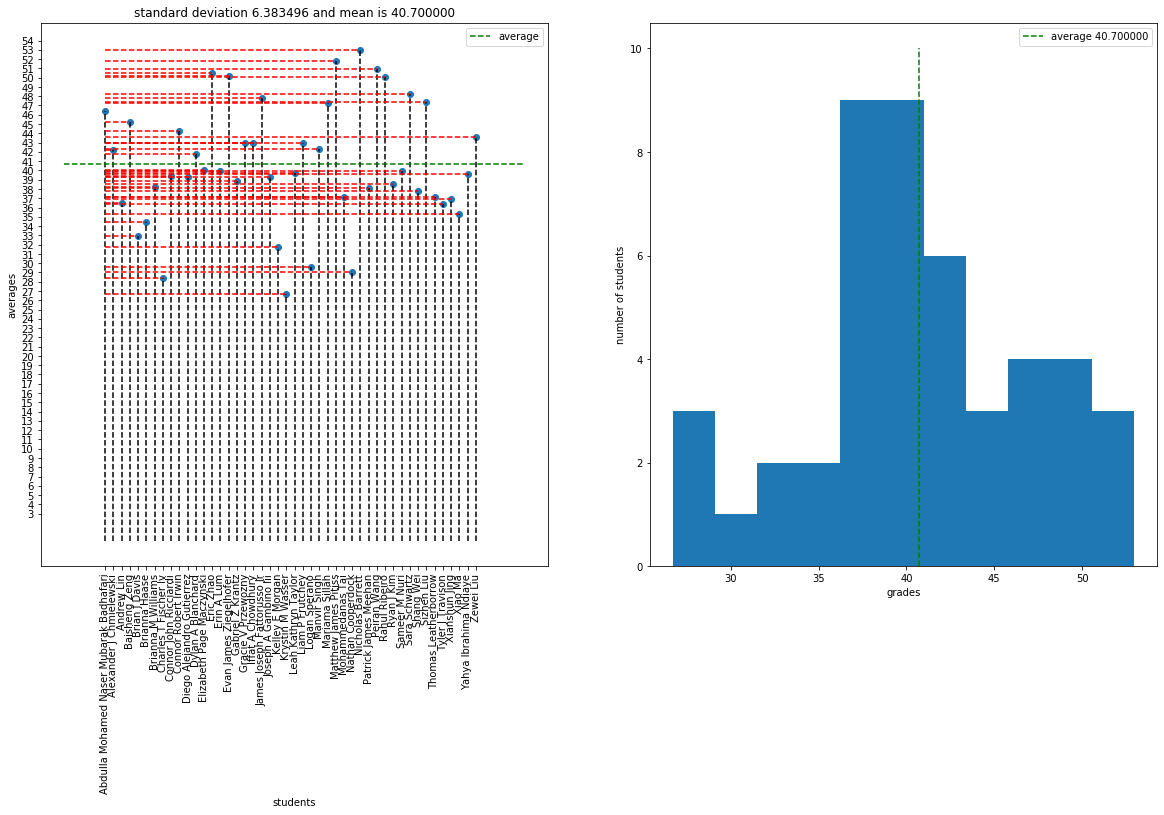

In [4]:
A.display()

In [5]:
A.rank_names()

[['Krystin M Wasser', 'Charles T Fischer Iv', 'Nathan Cooperdock'],
 ['Logan Sperano'],
 ['Kelley E Morgan', 'Brian J Davis'],
 ['Brianna Haase', 'Xiao Ma'],
 ['Tyler J Travison',
  'Andrew Lin',
  'Xianshun Jing',
  'Mohammedanas Tai',
  'Thomas Leatherborrow',
  'Shang Wei',
  'Patrick James Meehan',
  'Brianna M Williams',
  'Ryan J Kim'],
 ['Gabriel Z Krantz',
  'Diego Alejandro Gutierrez',
  'Joseph A Gambino Iii',
  'Connor John Ricciardi',
  'Yahya Ibrahima Ndiaye',
  'Leah Kathryn Taylor',
  'Erin A Lum',
  'Sameer M Nuri',
  'Elizabeth Page Maczynski'],
 ['Dylan A Blanchard',
  'Alexander J Chmielewski',
  'Manvir Singh',
  'Gracie V Przewozny',
  'Liam P Frutchey',
  'Iffat A Chowdhury'],
 ['Zewei Liu', 'Connor Robert Irwin', 'Baisheng Zeng'],
 ['Abdulla Mohamed Naser Mubarak Badhafari',
  'Mariama Sillah',
  'Sizhen Liu',
  'James Joseph Fattorusso Jr'],
 ['Sara Schwartz', 'Rahul Ribeiro', 'Evan James Ziegelhofer', 'Eric Zhao'],
 ['Peiran Wang', 'Matthew James Pitiss', 'Nich

<Figure size 432x288 with 0 Axes>